In [58]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

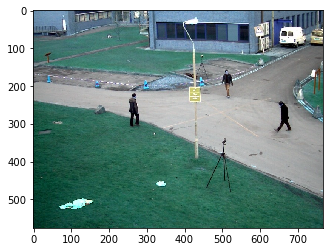

In [59]:
frame1 = cv2.imread('sequence/000001.jpg')
plt.imshow(frame1)

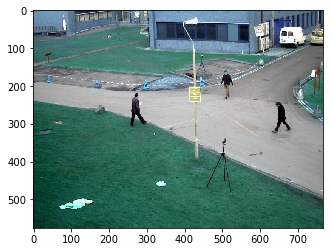

In [60]:
frame2 = cv2.imread('sequence/000002.jpg')
plt.imshow(frame2)

In [61]:
#frame difference
diff = cv2.absdiff(frame1, frame2)

In [62]:
gray = cv2.cvtColor(diff,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
_,threshold = cv2.threshold(blur,20,255,cv2.THRESH_BINARY)
dilated = cv2.dilate(threshold,None,iterations = 3)
contours,_ = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [63]:
# for contour in contours:
#     (x,y,w,h) = cv2.boundingRect(contour)
#     if cv2.contourArea(contour) < 700:
#         continue
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
#     cv2.putText(img, "Status: {}".format('Movement'), (10, 20), cv2.FONT_HERSHEY_SIMPLEX,1, (0, 0, 255), 3)

In [64]:
#detect contours and store in list
#get boundary points as tuple
pedestrians = []
for contour in contours:
    (x,y,w,h) = cv2.boundingRect(contour)
    pedestrians.append((x,y,w,h))

In [65]:
#draw rectangular bounding box
for contour in contours:
    (x,y,w,h) = cv2.boundingRect(contour)
    if cv2.contourArea(contour) < 700:
        continue
    #draw rectangle
    cv2.rectangle(frame1,(x,y),(x+w,y+h),(0,255,0),5)
    #cv2.arrowedLine(frame1, (x,y), (x+50,y+50),(0,255,0),9, tipLength = 0.5)
    #cv2.putText(frame1, "Count: {}".format(math.floor(len(pedestrians)/4)), (20, 20), cv2.FONT_HERSHEY_SIMPLEX,1, (0, 255,0), 3)

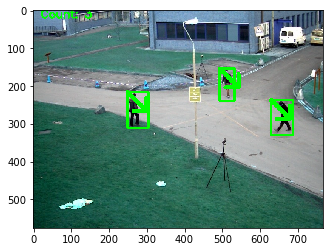

In [66]:
plt.imshow(frame1)

In [67]:
math.floor(len(pedestrians)/4)

3